# Partie 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# On charge le dataset

house_data = pd.read_csv('googleplaystore.csv')

col =["Rating","Reviews","Size","Installs","Type","Price","Content Rating","Last Updated","Current Ver","Android Ver"]
house_data.drop([10472],axis = 0,inplace=True ) # on supprime la ligne 10472 parce que ses valeurs sont aberrante 
house_data = house_data.drop_duplicates() # c'est pour supprimer les doublons
print(house_data)
print(house_data.dtypes)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
6                Smoke Effect Photo Maker - Smoke Editor       ART_AND_DESIGN   
7                                       Infinite Painter       ART_AND_DESIGN   
8                                   Garden Coloring Book       ART_AND_DESIGN   
9                          Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
10                               Text on Photo - Fonteee       ART_AND_DESIGN   
11               Name Art Ph

# Regression linéaire

       Rating   Reviews       Size    Installs  Price
0         4.1     159.0  19.000000     10000.0    0.0
1         3.9     967.0  14.000000    500000.0    0.0
2         4.7   87510.0   8.700000   5000000.0    0.0
3         4.5  215644.0  25.000000  50000000.0    0.0
4         4.3     967.0   2.800000    100000.0    0.0
5         4.4     167.0   5.600000     50000.0    0.0
6         3.8     178.0  19.000000     50000.0    0.0
7         4.1   36815.0  29.000000   1000000.0    0.0
8         4.4   13791.0  33.000000   1000000.0    0.0
9         4.7     121.0   3.100000     10000.0    0.0
10        4.4   13880.0  28.000000   1000000.0    0.0
11        4.4    8788.0  12.000000   1000000.0    0.0
12        4.2   44829.0  20.000000  10000000.0    0.0
13        4.6    4326.0  21.000000    100000.0    0.0
14        4.4    1518.0  37.000000    100000.0    0.0
15        3.2      55.0   2.700000      5000.0    0.0
16        4.7    3632.0   5.500000    500000.0    0.0
17        4.5      27.0  17.

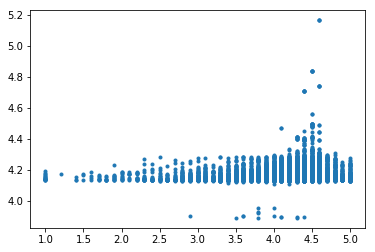

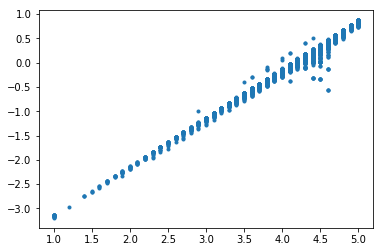

In [2]:

import pandas as pd # On importe la librairie Pandas, que l'on surnomme 'pd'
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # librairie pour tracer le graphique

df1 = house_data.drop(["App","Category","Genres","Type","Content Rating","Last Updated","Current Ver","Android Ver"],axis = 1 )
df1['Reviews']= df1['Reviews'].astype('float64')

def convert_price(price): # fonction qui enlève le caractère $ qui est devant les prix et les transforme en float
    if price[0] =='$':
        value = price[1:]
        return float(value)
    else:
        return float(price)
    
df1['Price'] = [convert_price(t) for t in df1['Price']] 

def convert_installs(install): # fonction qui enlève le caractère '+' qui est derrier les nombre d'installation et les transforme en float
    if install[-1] =='+':
        value = install[:-1]
        value = value.replace(',','')  # pour supprimer la virgule au milieu des chiffres
        return float(value)
    else:
        return float(install)

df1['Installs'] = [convert_installs(t) for t in df1['Installs']] 

def convert_size(size): # la fonction qui transforme tous les taille en MegaOctet
    if size =='Varies with device': # on mets un NaN lorsque la taille est une valeur aberrante  
        return np.NaN
    elif size[-1] == 'k': # on transforme les tailles de KiloOctet à MegaOctet 
        v = size[:-1]
        f = float(v)
        return f/1024
    else:
        value = size[:-1] # on enlève le dernier caractère, qui est 'm'
        return float(value)
   
df1['Size'] = [convert_size(t) for t in df1['Size']] 

df1 = df1.dropna() # on supprime les lignes qui contiennent des NaN

print(df1)
print(df1.dtypes)

#créer un objet reg lin
modeleReg=LinearRegression()

#créer y et X
list_var=df1.columns.drop("Rating")
y=df1.Rating
X=df1[list_var]

modeleReg.fit(X,y)
theta0=modeleReg.intercept_  # le parametre theta0 indépendant de l'individu
theta1=modeleReg.coef_   # le parametre theta1 qui doit être multiplié par les valeur Review, Size, Installs et Price 
# la fonction prédiction c'est (theta1 * x) + theta0    (où x est l'individu qu'on va prédire son Rating )       
print("theta0 =",theta0)
print("theta1 =",theta1)         

plt.plot(y, modeleReg.predict(X),'.')
plt.show()

plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()


[ 4.16410409  4.15449021  4.14429949 ...,  4.22947852  4.13449332
  4.16410409]


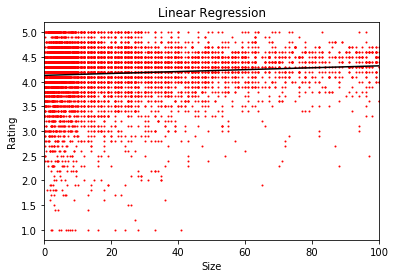

In [3]:
from sklearn import linear_model
size = df1[["Size"]]
rating = df1["Rating"]
regr = linear_model.LinearRegression()
regr.fit(size, rating)
print(regr.predict(size))


theta0 =regr.intercept_
theta1 = regr.coef_

plt.title('Linear Regression') 
plt.xlabel('Size') 
plt.ylabel('Rating') 
plt.xlim(0, 100)
plt.plot(size, rating, 'ro', markersize=1)

# On affiche la droite entre 0 et 100
plt.plot([0,100], [theta0,theta0 + 100 * theta1], linestyle='-', c='#000000')

plt.show()


[ 4.16626627  4.16658251  4.16948675 ...,  4.16626304  4.16625988
  4.17271368]


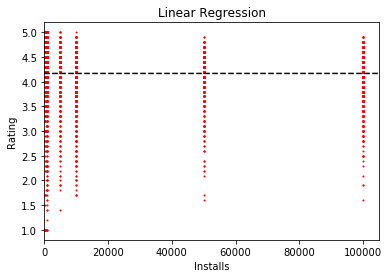

In [4]:
from sklearn import linear_model
installs = df1[["Installs"]]
rating = df1["Rating"]
regr = linear_model.LinearRegression()
regr.fit(installs, rating)
print(regr.predict(installs))


theta0 =regr.intercept_
theta1 = regr.coef_

plt.title('Linear Regression') 
plt.xlabel('Installs') 
plt.ylabel('Rating') 
plt.xlim(0, 105000)
plt.plot(installs, rating, 'ro', markersize=1)

# On affiche la droite entre 0 et 105000
plt.plot([0,105000], [theta0,theta0 + 105000 * theta1], linestyle='--', c='#000000')

plt.show()




[ 4.16424155  4.16426204  4.16645741 ...,  4.16423848  4.16423761
  4.1743415 ]


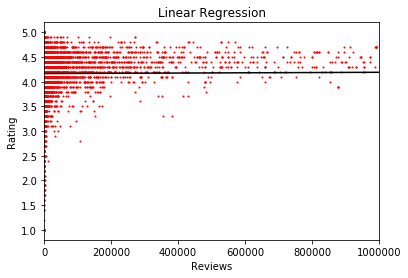

In [5]:
from sklearn import linear_model
reviews = df1[["Reviews"]]
rating = df1["Rating"]
regr = linear_model.LinearRegression()
regr.fit(reviews, rating)
print(regr.predict(reviews))


theta0 =regr.intercept_
theta1 = regr.coef_

plt.title('Linear Regression') 
plt.xlabel('Reviews') 
plt.ylabel('Rating') 
plt.xlim(0, 1000000)
plt.plot(reviews, rating, 'ro', markersize=1)

# On affiche la droite entre 0 et 1000000
plt.plot([0,1000000], [theta0,theta0 + 1000000 * theta1], linestyle='-', c='#000000')

plt.show()

[ 4.1720692  4.1720692  4.1720692 ...,  4.1720692  4.1720692  4.1720692]


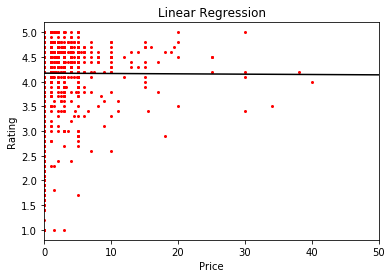

In [6]:
from sklearn import linear_model
price = df1[["Price"]]
rating = df1["Rating"]
reg = linear_model.LinearRegression()
reg.fit(price, rating)
print(reg.predict(price))


theta0 =reg.intercept_
theta1 = reg.coef_

plt.title('Linear Regression') 
plt.xlabel('Price') 
plt.ylabel('Rating') 
plt.xlim(0, 50)
plt.plot(price, rating, 'ro', markersize=2)

# On affiche la droite entre 0 et 50
plt.plot([0,50], [theta0,theta0 + 50 * theta1], linestyle='-', c='#000000')

plt.show()

Dans un premier temps, on charge notre jeu de données qui est sous format CSV en utilisant la bibliothèque pandas. Enuit on sépare les données quantitative et qualitative car la régresion linéaire d'applique sur les données numériques (par ex : Rating, Reviews, Size, Installs et price).

Après avoir supprimée les données non numériques nous procédons au nettoyage des données c'est-à-dire on supprime les données aberrante, des doublons et ensuit on enlève les caratères 'M','k','+' et ',' et on les transforme en float pour pouvoir manipuler et faire la régression dessous.on supprime également les lignes qui contiennent des NaN.

A cet étape de notre projet, on a fait une régression linéaire multivariée (en utilisant scikit-Learn) pour trouver une fonction prédictive. Ici notre variable cible (Rating) est le fruit de la corrélation de plusieurs variables prédictives (Reviews, size, Price,Installs). En appliquant la méthode fit, On obtient la valeur theta0 et les matrices theta1 qui nous permettent de déterminer notre fonction de prédiction. Ensuit on calcule les valeurs Score et RMSE pour pouvoir évaluer notre modèle. on voit que d'un côté la valeur score est assez faible (0.011) et de l'autre côté on a une erreur quadratique moyen (RMSE) qui est égale à 0.54. cela montre que la différence moyenne entre la valeur qu'on a prédit pour "Rating" et sa valeur réelle est trop grande. En fait notre modèle de prédiction n'est pas très adapté aux données.

A la fin, on fait une régression linéaire simple entre chacune des variable (size, installs,reviews et price) et la variable cible "Rating" pour pouvoir visualiser les droites de régression dans un plan 2D

# Partie 2

66.0
   gender  race/ethnicity  parental level of education  lunch  \
0       2               2                            1      1   
1       2               3                            2      1   
2       2               2                            4      1   
3       1               1                            3      2   
4       1               3                            2      1   

   test preparation course  math score  reading score  writing score  class  
0                        1          72             72             74      1  
1                        2          69             90             88      1  
2                        1          90             95             93      1  
3                        1          47             57             44      0  
4                        1          76             78             75      1  


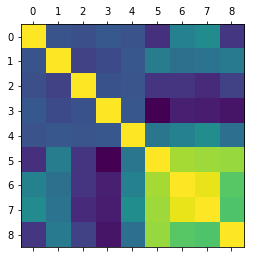

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


split_var=0.01 # quand on aura besoin de créer en ensemble de test et d'entrainement



# nous mettons toutes les données sous forme numerique
house_data = pd.read_csv('StudentsPerformance.csv')
name=['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score','writing score']
house_data.replace({'male':1,'female':2},inplace=True)
house_data.replace({'group A':1,'group B':2,'group C':3,'group D':4,'group E':5},inplace=True)
house_data.replace({'bachelor\'s degree':1,'some college':2,'associate\'s degree':3,'master\'s degree':4,'high school':5,'some high school':6},inplace=True)
house_data.replace({'standard':1,'free/reduced':2},inplace=True)
house_data.replace({'none':1,'completed':2},inplace=True)



math_mediane=((house_data.sort_values(by=['math score'])).median())['math score'] # calcule de la medianne
print(math_mediane)
#fonction qui determineà quelle classe appartient x
def getclass (x):
    if (x < math_mediane):
        return 0
    else :
        return 1

#on rajoute une colonne indiquant a quelle classe appartient chaque variable
house_data['class']=house_data['math score'].apply(lambda x : getclass(x))  




print(house_data.head())
plt.matshow(house_data.corr()) # nous faisons une matrice de correlation
plt.show()

Nous pouvons voire que les troiss dernières variables sont fortement corrélées entre elles et que ces dernièer ne sont que très faiblement corrélé avec les variable 2 et 3.

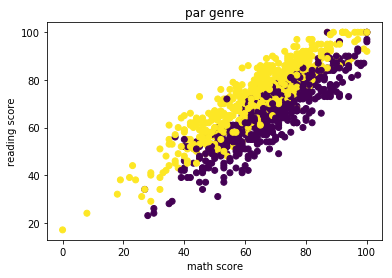

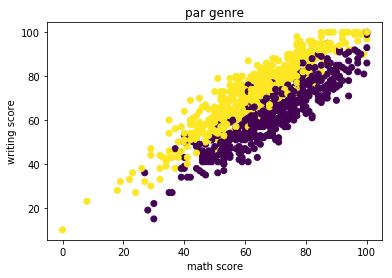

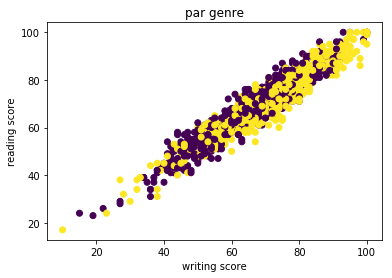

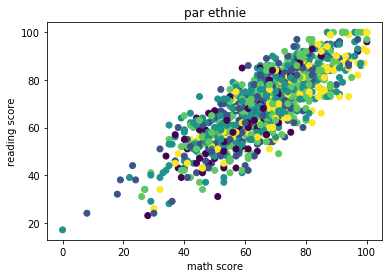

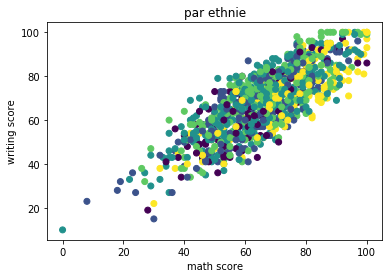

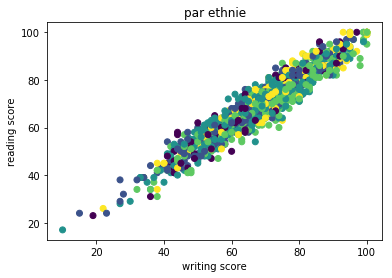

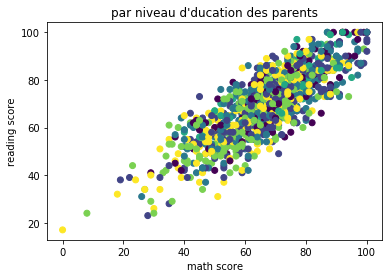

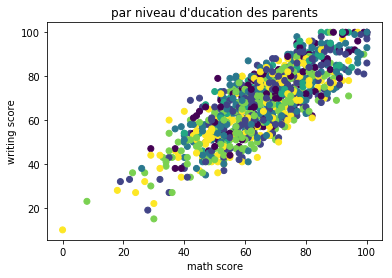

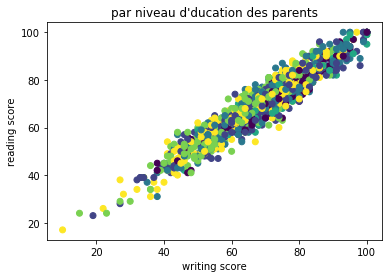

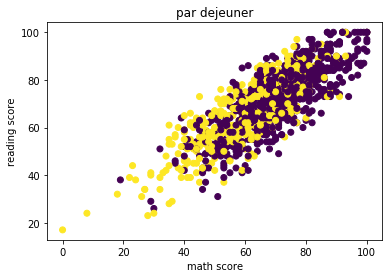

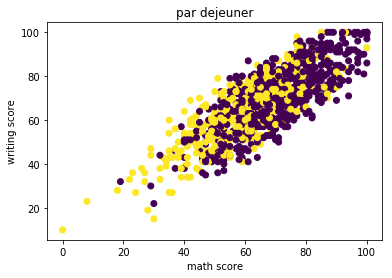

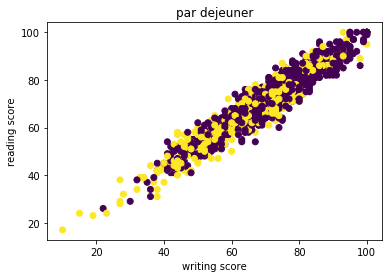

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 16: ordinal not in range(128)

In [8]:


    
################ graphique pour le genre #####################

plt.scatter(house_data['math score'],house_data['reading score'],c=house_data['gender'])
plt.title("par genre")
plt.xlabel("math score")
plt.ylabel("reading score")
plt.show()


plt.scatter(house_data['math score'],house_data['writing score'],c=house_data['gender'])
plt.title("par genre")
plt.xlabel("math score")
plt.ylabel("writing score")
plt.show()

plt.scatter(house_data['writing score'],house_data['reading score'],c=house_data['gender'])
plt.title("par genre")
plt.xlabel("writing score")
plt.ylabel("reading score")
plt.show()

################ graphique pour l'ethnie #####################

plt.scatter(house_data['math score'],house_data['reading score'],c=house_data['race/ethnicity'])
plt.title("par ethnie")
plt.xlabel("math score")
plt.ylabel("reading score")
plt.show()

plt.scatter(house_data['math score'],house_data['writing score'],c=house_data['race/ethnicity'])
plt.title("par ethnie")
plt.xlabel("math score")
plt.ylabel("writing score")
plt.show()

plt.scatter(house_data['writing score'],house_data['reading score'],c=house_data['race/ethnicity'])
plt.title("par ethnie")
plt.xlabel("writing score")
plt.ylabel("reading score")
plt.show()

################ graphique pour le niveau d'education des parents #####################

plt.scatter(house_data['math score'],house_data['reading score'],c=house_data['parental level of education'])
plt.title("par niveau d'ducation des parents")
plt.xlabel("math score")
plt.ylabel("reading score")
plt.show()

plt.scatter(house_data['math score'],house_data['writing score'],c=house_data['parental level of education'])
plt.title("par niveau d'ducation des parents")
plt.xlabel("math score")
plt.ylabel("writing score")
plt.show()

plt.scatter(house_data['writing score'],house_data['reading score'],c=house_data['parental level of education'])
plt.title("par niveau d'ducation des parents")
plt.xlabel("writing score")
plt.ylabel("reading score")
plt.show()

################ graphique pour le dejuener #####################

plt.scatter(house_data['math score'],house_data['reading score'],c=house_data['lunch'])
plt.title("par dejeuner")
plt.xlabel("math score")
plt.ylabel("reading score")
plt.show()

plt.scatter(house_data['math score'],house_data['writing score'],c=house_data['lunch'])
plt.title("par dejeuner")
plt.xlabel("math score")
plt.ylabel("writing score")
plt.show()

plt.scatter(house_data['writing score'],house_data['reading score'],c=house_data['lunch'])
plt.title("par dejeuner")
plt.xlabel("writing score")
plt.ylabel("reading score")
plt.show()

################ graphique pour la preparation à l'examen #####################

plt.scatter(house_data['math score'],house_data['reading score'],c=house_data['test preparation course'])
plt.title("par preparation à l'examen")
plt.xlabel("math score")
plt.ylabel("reading score")
plt.show()

plt.scatter(house_data['math score'],house_data['writing score'],c=house_data['test preparation course'])
plt.title("par preparation à l'examen")
plt.xlabel("math score")
plt.ylabel("writing score")
plt.show()

plt.scatter(house_data['writing score'],house_data['reading score'],c=house_data['test preparation course'])
plt.title("par preparation à l'examen")
plt.xlabel("writing score")
plt.ylabel("reading score")
plt.show()



on remarque ici que le genre n'est pas répartie de manière homogène  par rapport aux notes contrèrement aux autres variables qualitative

## mixture de gaussienne

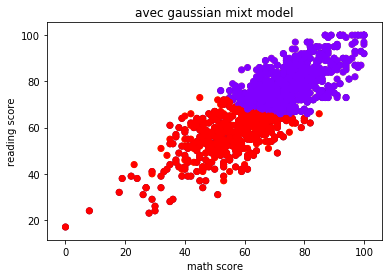

[[ 74.15847419  77.79253127]
 [ 57.09822789  59.5609137 ]]


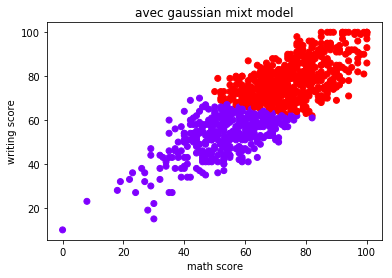

[[ 56.83797278  57.44624236]
 [ 73.48952843  76.53986974]]


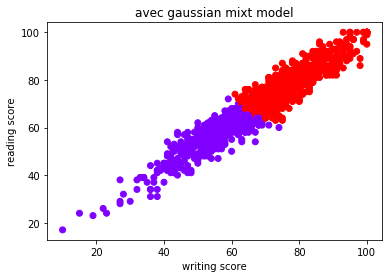

[[ 58.61301779  57.06344714]
 [ 77.68599924  76.92162866]]


In [9]:
from sklearn.mixture import GaussianMixture

data_x = data = house_data.drop(['class','gender','race/ethnicity','parental level of education','lunch','test preparation course','writing score'],axis = 1)
gmm = GaussianMixture(n_components=2)
gmm.fit(data_x.values)
plt.scatter(data_x['math score'],data_x['reading score'],c=gmm.predict(data_x.values), cmap='rainbow')
plt.title("avec gaussian mixt model")
plt.xlabel("math score")
plt.ylabel("reading score")
plt.show()
print(gmm.means_)



data_x = data = house_data.drop(['class','gender','race/ethnicity','parental level of education','lunch','test preparation course','reading score'],axis = 1)
gmm = GaussianMixture(n_components=2)
gmm.fit(data_x.values)

plt.scatter(data_x['math score'],data_x['writing score'],c=gmm.predict(data_x.values), cmap='rainbow')
plt.title("avec gaussian mixt model")
plt.xlabel("math score")
plt.ylabel("writing score")
plt.show()
print(gmm.means_)






data_x = data = house_data.drop(['class','gender','race/ethnicity','parental level of education','lunch','test preparation course','math score'],axis = 1)
gmm = GaussianMixture(n_components=2)
gmm.fit(data_x.values)

plt.scatter(data_x['writing score'],data_x['reading score'],c=gmm.predict(data_x.values), cmap='rainbow')
plt.title("avec gaussian mixt model")
plt.xlabel("writing score")
plt.ylabel("reading score")
plt.show()
print(gmm.means_)






Les données sont donc trop proches les une des autres pour que ce model soit efficace. La zonne d'intersection des deux gaussienne doit être grande 
Un autre problème concerne la distance des données les une par rapport au autre est que les 5 première variable sont des variable qualitative que nous avons du changer en numerique. Donc celon les valeur que on leur donne les résultat varie. Nous avons donc choisit de ne pas les utiliser.


## Kmeans

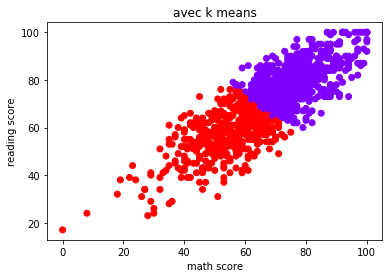

[[ 76.72304833  79.57434944]
 [ 53.70562771  57.05194805]]


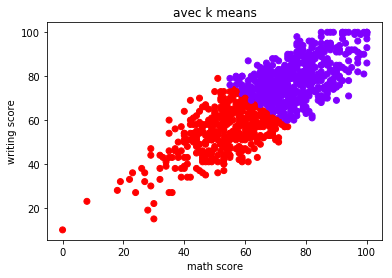

[[ 75.9540636   78.31272085]
 [ 53.2235023   54.67511521]]


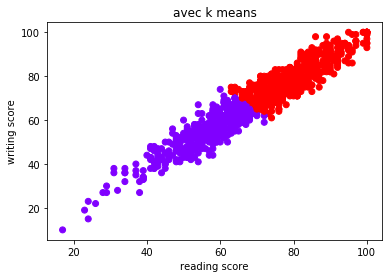

[[ 56.12837838  54.53603604]
 [ 79.58273381  78.84892086]]
[[ 53.74324324  56.37837838  54.86036036]
 [ 75.94784173  79.38309353  78.58992806]]


In [10]:
#juste avec les donnée math score et reding score
data1 = house_data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course','writing score','class'],axis = 1)
#juste avec les donnée math score et writing score
data2 = house_data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course','reading score','class'],axis = 1)
#juste avec les donnée reading score et writing score
data3 = house_data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','class'],axis = 1)

data4 = house_data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course','class'],axis = 1)

kmeans = KMeans(n_clusters=2, random_state=0).fit(data1.values)
plt.scatter(house_data['math score'],house_data['reading score'],c=kmeans.labels_, cmap='rainbow')
plt.title("avec k means")
plt.xlabel("math score")
plt.ylabel("reading score")
plt.show()
print(kmeans.cluster_centers_)


kmeans = KMeans(n_clusters=2, random_state=0).fit(data2.values)
plt.scatter(house_data['math score'],house_data['writing score'],c=kmeans.labels_, cmap='rainbow')
plt.title("avec k means")
plt.xlabel("math score")
plt.ylabel("writing score")
plt.show()
print(kmeans.cluster_centers_)


kmeans = KMeans(n_clusters=2, random_state=0).fit(data3.values)
plt.scatter(house_data['reading score'],house_data['writing score'],c=kmeans.labels_, cmap='rainbow')
plt.title("avec k means")
plt.xlabel("reading score")
plt.ylabel("writing score")
plt.show()
print(kmeans.cluster_centers_)

kmeans = KMeans(n_clusters=2, random_state=0).fit(data4.values)
print(kmeans.cluster_centers_)




Pour l'algorithme de Kmean nous avons décidé de n'utiliser que les trois dernières variables car cet algorithme fonctionne avec une notion de distance. En effet les 5 première variables étaient catégorielles et nous leur avons donnée des valeur numérique arbitraire, de ce fait la distance entre deux catégorie ne rprésente rien pour les données car c'est nous qui l'avons choisi.

Pour le resultat on peut voir que les données étant 'compacte' on ne peut pas avec ces variables créer deux cluster distinc de manière simple. pour le resultat on peu remarqué aussi que la frontière se situeau milieu du nuage de point.

Les resultats sont très similaire à ceux de la mixture gaussienne
Pour évité le problème que l'on a rencontré avec les valeur des données une reduction des dimension des données par ACP aurait pu être une solution viable.

### K plus proche voisin

In [11]:

data = house_data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score'],axis = 1)
train, test = train_test_split(data, test_size=split_var)

In [12]:
# calcule la distance d'un point à tout les autres sans faire la racine carrée car c'est une fonction croissante donc 
#ne change pas l'ordre 
#on renvoie l'indice du plus proche
def le_plus_proche (x_lecture,x_ecriture):
    
    res=train.copy()
    res['reading score']-=x_lecture
    res['writing score']-=x_ecriture
    
    res['reading score']=res['reading score']*res['reading score']
    res['writing score']=res['writing score']*res['writing score']
    df = pd.DataFrame({'sum' :res['reading score']+res['writing score']})
    return df['sum'].idxmin()


#renvoie la classe du point le plus proche
def prediction_k_plus_proche_voisin (i):
    return house_data['class'].get(i)

#renvoie la classe 
def get_class(j):
    return house_data['class'].get(j)




In [13]:
tp=0
fp=0
tn=0
fn=0
for n in range(10):
    train, test = train_test_split(data, test_size=split_var)
    
    for x in test.index:
        i=le_plus_proche(data.iat[x,0],data.iat[x,1])
        p=prediction_k_plus_proche_voisin(i)
        r=get_class(x)
        if p != r:
            if p==1:
                fp+=1
            else:
                fn+=1
        else:
            if p==1:
                tp+=1
            else:
                tn+=1
print('true positive = ',tp)
print('true negative = ',tn)
print('false positive = ',fp)
print('false negative = ',fn)
print('erreur = ',fp+fn,' sur ',1000*split_var*10)



('true positive = ', 40)
('true negative = ', 36)
('false positive = ', 12)
('false negative = ', 12)
('erreur = ', 24, ' sur ', 100.0)


Pour la même raison que pour Kmeans on ne preds que les variables reading score et writing score

L'erreur est de environ 25% et elle est equitablement repartie entre faux positif et faux negatif. Ce taux d'rreur si important s'explique par le fait  que les données sont très concentrées autour de la mediane ( voir graphique précedent)



## Bayesien naif

In [14]:
data = house_data.drop(['math score','reading score','writing score'],axis = 1)

################ ces fonction renvoie la probabilité sachant que Y=1, que Xi soit égale à leur paramètre #####################
def P1_genre(x_genre):
    return train[ (train['gender']==x_genre) & (train['class']==1)].count()['gender'] /train[ train['class']==1].count()['class']
def P1_race(x_race):
     return train[ (train['race/ethnicity']==x_race) & (train['class']==1)].count()['race/ethnicity'] /train[ train['class']==1].count()['class']
def P1_parent(x_parent):
    return train[ (train['parental level of education']==x_parent) & (train['class']==1)].count()['parental level of education'] /train[ train['class']==1].count()['class']
def P1_dejeuner(x_dejeuner):
     return train[ (train['lunch']==x_dejeuner) & (train['class']==1)].count()['lunch'] /train[ train['class']==1].count()['class']
def P1_preparation(x_preparation):
     return train[ (train['test preparation course']==x_preparation) & (train['class']==1)].count()['test preparation course'] /train[ train['class']==1].count()['class']
    
    
    
    
################ ces fonction renvoie la probabilité sachant que Y=0, que Xi soit égale à leur paramètre #####################

def P0_genre(x_genre):
    return train[ (train['gender']==x_genre) & (train['class']==0)].count()['gender'] /train[ train['class']==0].count()['class']
def P0_race(x_race):
     return train[ (train['race/ethnicity']==x_race) & (train['class']==0)].count()['race/ethnicity'] /train[ train['class']==0].count()['class']
def P0_parent(x_parent):
    return train[ (train['parental level of education']==x_parent) & (train['class']==0)].count()['parental level of education'] /train[ train['class']==0].count()['class']
def P0_dejeuner(x_dejeuner):
     return train[ (train['lunch']==x_dejeuner) & (train['class']==0)].count()['lunch'] /train[ train['class']==0].count()['class']
def P0_preparation(x_preparation):
     return train[ (train['test preparation course']==x_preparation) & (train['class']==0)].count()['test preparation course'] /train[ train['class']==0].count()['class']


    
    
################ cette fonction renvoie la probabilité sachant que Y=1, que X soit égale à leur paramètre #####################
    
def PX_sachant_Y1 (x_genre,x_race,x_parent,x_dejeuner,x_preparation):
    return P1_genre(x_genre)*P1_race(x_race)*P1_parent(x_parent)*P1_dejeuner(x_dejeuner)*P1_preparation(x_preparation)


################ ces fonction renvoie la probabilité sachant que Y=0, que X soit égale à leur paramètre #####################

def PX_sachant_Y0 (x_genre,x_race,x_parent,x_dejeuner,x_preparation):
    return  P0_genre(x_genre)*P0_race(x_race)*P0_parent(x_parent)*P0_dejeuner(x_dejeuner)*P0_preparation(x_preparation)

#renvoie la prédiction après avoir calculé le probabilité
def prediction_NB (x):
    PX_Y1=PX_sachant_Y1(data.iat[x,0],data.iat[x,1],data.iat[x,2],data.iat[x,3],data.iat[x,4])
    PX_Y0=PX_sachant_Y0(data.iat[x,0],data.iat[x,1],data.iat[x,2],data.iat[x,3],data.iat[x,4])
    r=(PY1*PX_Y1)/(PY1*PX_Y1+PY0*PX_Y0)
    if (r < 0.5):
        return 0
    else :
        return 1

In [15]:
tp=0
fp=0
tn=0
fn=0
for n in range(10):
    train, test = train_test_split(data, test_size=split_var)
    for x in test.index:
        PY1=train['class'].sum()/train['class'].size
        PY0=1-PY1
        p=prediction_NB (x)
        r=get_class(x)
        if p != r:
            if p==1:
                fp+=1
            else:
                fn+=1
        else:
            if p==1:
                tp+=1
            else:
                tn+=1
print('true positive = ',tp)
print('true negative = ',tn)
print('false positive = ',fp)
print('false negative = ',fn)
print('erreur = ',fp+fn,' sur ',1000*split_var*10)

/Users/plu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in long_scalars


('true positive = ', 0)
('true negative = ', 52)
('false positive = ', 0)
('false negative = ', 48)
('erreur = ', 48, ' sur ', 100.0)


Le resultat ici aussi nest pas très satisfaisant entre 25/30% d'erreur en moyenne.Ceci est du au fait que nous utilisons 5 variables et que ces dernière ne sont pas vraiment indépendantes entre elles ( voire la matrice de corelation)
de plus il existe un autre problème qui fait que cet algorithme ne marche pas bien, c'est le fait que la variable x peut prendre 240 valeur différent dans ce cas et que n'ous n'avons que 1000 données. Donc les dnnées ne sont pas assez nombreuse pour avoir des estimations statistiques assez proche des probabilitées.

### gaussian naive bayes

In [16]:
data = house_data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score'],axis = 1)


def f1(x):
    return np.power((data.iat[x,0]-moyenne_lecture_Y1)/ec_lecture_Y1,2) + np.power((data.iat[x,1]-moyenne_ecrit_Y1)/ec_ecrit_Y1,2)

def f0(x):
    return np.power((data.iat[x,0]-moyenne_lecture_Y0)/ec_lecture_Y0,2) + np.power((data.iat[x,1]-moyenne_ecrit_Y0)/ec_ecrit_Y1,2)

    
def prediction_GNB (x):
    PX_Y1= - np.log(ec_lecture_Y1) - np.log(ec_ecrit_Y1) - 0.5*f1(x) + np.log(PY1)
    PX_Y0= - np.log(ec_lecture_Y0) - np.log(ec_ecrit_Y0) - 0.5*f0(x) + np.log(PY1)
    
    if (PX_Y1 < PX_Y0):
        return 0
    else :
        return 1

In [17]:
tp=0
fp=0
tn=0
fn=0
for n in range(10):
    train, test = train_test_split(data, test_size=split_var)
    for x in test.index:
        PY1=train['class'].sum()/train['class'].size
        PY0=1-PY1
        moyenne_lecture_Y1 = train[train['class']==1].mean()['reading score']
        moyenne_ecrit_Y1   = train[train['class']==1].mean()['writing score']
        ec_lecture_Y1 = train[train['class']==1].std()['reading score']
        ec_ecrit_Y1   = train[train['class']==1].std()['writing score']
        
        moyenne_lecture_Y0 = train[train['class']==0].mean()['reading score']
        moyenne_ecrit_Y0   = train[train['class']==0].mean()['writing score']
        ec_lecture_Y0 = train[train['class']==0].std()['reading score']
        ec_ecrit_Y0   = train[train['class']==0].std()['writing score']
        
        p=prediction_GNB (x)
        r=get_class(x)
        if p != r:
            if p==1:
                fp+=1
            else:
                fn+=1
        else:
            if p==1:
                tp+=1
            else:
                tn+=1
print('true positive = ',tp)
print('true negative = ',tn)
print('false positive = ',fp)
print('false negative = ',fn)
print('erreur = ',fp+fn,' sur ',1000*split_var*10)

/Users/plu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log
/Users/plu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


('true positive = ', 55)
('true negative = ', 0)
('false positive = ', 45)
('false negative = ', 0)
('erreur = ', 45, ' sur ', 100.0)


Le resultat ici aussi nest pas très satisfaisant entre 25/30% d'erreur en moyenne.Ceci est du au fait que nous utilisons 2 variables qui ne sont pas du tout indépendantes ( voire la matrice de corelation) 

## régression logistique

In [18]:

data_y = data = house_data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score','writing score'],axis = 1)
data_x = data = house_data.drop(['class','parental level of education','lunch','test preparation course','math score','reading score'],axis = 1)

In [19]:
from sklearn.linear_model import LogisticRegression
n=100
r=0
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split( data_x, data_y, test_size=split_var)
    model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',warm_start =True,max_iter=1000)
    model.fit(X_train,y_train)
   # print(y_test)
    r+=model.score(X_test,y_test)
print(r/n)

/Users/plu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.846


Avec la regression logistique on arraive à avoir de bon résultats, avec un taux d'erreur entre 10% et 15%; enutilisant ces parametres.



Etudiant :  Shahram MAHDAVI  et Charly SIMONIAN